<h1 style="text-align:center;"> Learning with the Indicators of Heart Disease dataset </h1>
<p style="text-align:center;"> https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease </p>


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pingouin as pg
from scipy.stats import spearmanr


In [193]:
data = pd.read_csv("data/heart_2022_with_nans.csv")
df = pd.DataFrame(data)
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Getting familiar with the data

In [194]:
print(df.shape) # 445 132 rows, 40 columns
df.info()

(445132, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer   

In [195]:
df.describe()  # Describes the base stats of the 6 float columns

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [196]:
df.duplicated().any()

True

In [197]:
duplicates = df[df.duplicated()]
duplicates  # There are 157 duplicates 

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
7310,Alaska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11503,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.7,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
28206,California,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29339,California,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32711,California,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411300,Washington,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427638,Wisconsin,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431351,Wisconsin,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431653,Wisconsin,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
df.drop_duplicates(inplace=True)
df.duplicated().any()  # No more duplicates

False

In [199]:
df.info()
pd.isnull(df).any()  # There are several missing data


<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

State                        False
Sex                          False
GeneralHealth                 True
PhysicalHealthDays            True
MentalHealthDays              True
LastCheckupTime               True
PhysicalActivities            True
SleepHours                    True
RemovedTeeth                  True
HadHeartAttack                True
HadAngina                     True
HadStroke                     True
HadAsthma                     True
HadSkinCancer                 True
HadCOPD                       True
HadDepressiveDisorder         True
HadKidneyDisease              True
HadArthritis                  True
HadDiabetes                   True
DeafOrHardOfHearing           True
BlindOrVisionDifficulty       True
DifficultyConcentrating       True
DifficultyWalking             True
DifficultyDressingBathing     True
DifficultyErrands             True
SmokerStatus                  True
ECigaretteUsage               True
ChestScan                     True
RaceEthnicityCategor

## Sleeping around

In [200]:
sleep = df.SleepHours
sleep.value_counts()
# sleep.describe()


SleepHours
7.0     132848
8.0     125387
6.0      95866
5.0      30120
9.0      21209
4.0      12432
10.0     10459
3.0       3260
12.0      3004
2.0       1549
1.0       1154
11.0       686
16.0       329
15.0       317
14.0       295
18.0       168
13.0       165
20.0       143
24.0        52
17.0        27
22.0        19
23.0        18
19.0        16
21.0         4
Name: count, dtype: int64

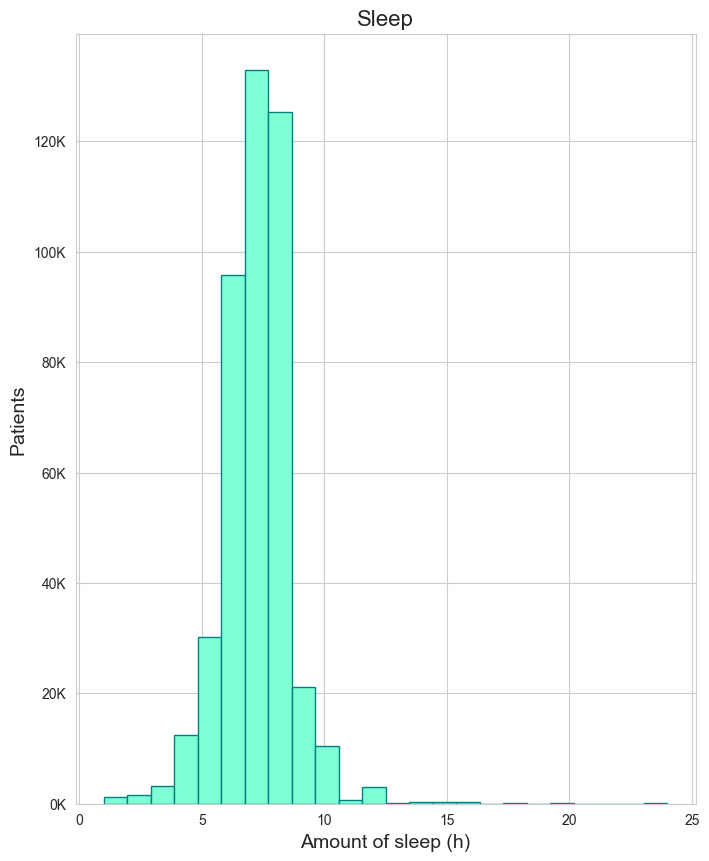

In [201]:
plt.figure(figsize=(8,10))
sleep_plot = plt.hist(sleep, bins=24, color="aquamarine", ec="teal")


formatter = FuncFormatter(lambda x, _: f'{x / 1000:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Sleep", fontsize=16)
plt.xlabel("Amount of sleep (h)", fontsize=14)
plt.ylabel("Patients", fontsize=14)
plt.show()

C:\Users\Dori\AppData\Local\Temp\ipykernel_14984\1048602483.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sleep, bins=24, kde=False, color="lime",


<Axes: xlabel='SleepHours'>

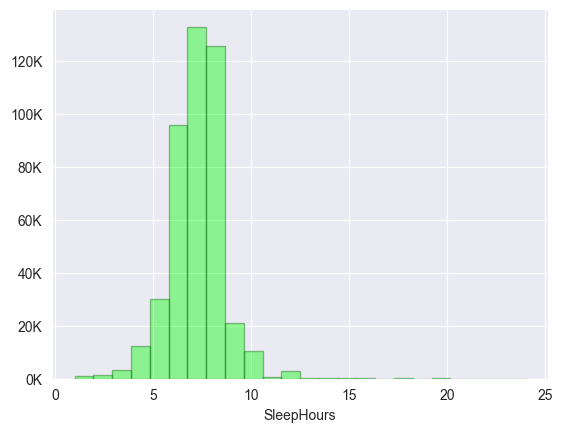

In [223]:
formatter = FuncFormatter(lambda x, _: f'{x / 1000:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
sns.set_style('dark')
sns.distplot(sleep, bins=24, kde=False, color="lime", 
             hist_kws={'edgecolor': 'darkgreen'} )

## Transforming the nominal data to ordinal - For correlation

In [203]:
# Change the Yes/No to 1/0
for column in df.columns:
    df[column] = df[column].replace({'No': 0, 'Yes': 1})
df.head()


C:\Users\Dori\AppData\Local\Temp\ipykernel_14984\25374325.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'No': 0, 'Yes': 1})


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0
1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,...,1.60,68.04,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,...,1.57,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,...,1.65,63.50,23.30,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,...,1.57,53.98,21.77,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0


In [204]:
# Add a new column: General Health grade
df.GeneralHealth.value_counts()
health_map = {"Excellent": 5,
              "Very good": 4,
              "Good": 3,
              "Fair": 2,
              "Poor": 1}

df["GeneralHealthGrade"] = df["GeneralHealth"].map(health_map)
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,GeneralHealthGrade
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,...,NaN,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,4.0
1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,...,68.04,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,5.0
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,...,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1,4.0
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,...,63.50,23.30,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,5.0
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,...,53.98,21.77,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,2.0


In [205]:
# Transform the sex: Male = 0, Female = 1
sex_map = {
    "Female": 1,
    "Male": 0
}
df["SexGrade"] = df["Sex"].map(sex_map)
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,GeneralHealthGrade,SexGrade
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,...,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,4.0,1
1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,...,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,5.0,1
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,...,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1,4.0,1
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,...,23.30,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,5.0,1
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,...,21.77,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,2.0,1


In [206]:
# Doctor visits: 0 = not long ago, 4 = long ago
df["LastCheckupTime"].value_counts()
checkup_map = {
    "Within past year (anytime less than 12 months ago)": 0,
    "Within past 2 years (1 year but less than 2 years ago)": 1,
    "Within past 5 years (2 years but less than 5 years ago)": 3,
    "5 or more years ago": 4
}
df["CheckupGrade"] = df["LastCheckupTime"].map(checkup_map)
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,GeneralHealthGrade,SexGrade,CheckupGrade
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,...,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,4.0,1,0.0
1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,...,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,5.0,1,NaN
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,1,4.0,1,0.0
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,...,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,5.0,1,0.0
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,...,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,2.0,1,0.0


In [207]:
# Removed teeth: 0 = none, 3 = all
df["RemovedTeeth"].value_counts()
teeth_map = {
    "None of them": 0,
    "1 to 5": 1,
    "6 or more, but not all": 2,
    "All": 3
}
df["TeethGrade"] = df["RemovedTeeth"].map(teeth_map)
df["TeethGrade"].value_counts()


TeethGrade
0.0    233323
1.0    129275
2.0     45569
3.0     25453
Name: count, dtype: int64

In [208]:
# Tetanus simplified: 0 = not, 1 = had shot
tetanus_map = {
    'Yes, received tetanus shot but not sure what type': 1,
    'No, did not receive any tetanus shot in the past 10 years': 0,
    'Yes, received Tdap': 1,
    'Yes, received tetanus shot, but not Tdap': 1
}
df["Tetanus"] = df["TetanusLast10Tdap"].map(tetanus_map)
df.head()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,GeneralHealthGrade,SexGrade,CheckupGrade,TeethGrade,Tetanus
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,...,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0,4.0,1,0.0,NaN,1.0
1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,...,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0,5.0,1,NaN,NaN,0.0
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,...,0.0,0.0,NaN,0.0,1,4.0,1,0.0,NaN,NaN
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,...,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,5.0,1,0.0,NaN,0.0
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,...,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,0,2.0,1,0.0,NaN,0.0


In [209]:
# Smoking: 0 = never, 3 = active
df["SmokerStatus"].value_counts()
smoke_map = {
    "Never smoked": 0,
    "Former smoker": 1,
    "Current smoker - now smokes some days": 2,
    "Current smoker - now smokes every day": 3
}

df["SmokeGrade"] = df["SmokerStatus"].map(smoke_map)
df["SmokeGrade"].value_counts()

SmokeGrade
0.0    245949
1.0    113769
3.0     36003
2.0     13938
Name: count, dtype: int64

In [210]:
# E-cigar: 0 = never, 3 = commonly
df["ECigaretteUsage"].value_counts()
e_cig_map = {
    "Never used e-cigarettes in my entire life": 0,
    "Not at all (right now)": 1,
    "Use them some days": 2,
    "Use them every day": 3
}

df["ECigGrade"] = df["ECigaretteUsage"].map(e_cig_map)
df["ECigGrade"].value_counts()

ECigGrade
0.0    311978
1.0     75367
2.0     11734
3.0     10382
Name: count, dtype: int64

In [211]:
# AgeGrade: 1 = young, 13 = old
list_of_age_groups = df["AgeCategory"].value_counts().index.sort_values()
age_map = {age: i+1 for i, age in enumerate(list_of_age_groups)}
df["AgeGroup"] = df["AgeCategory"].map(age_map)
df["AgeGroup"].value_counts()
print(age_map)


{'Age 18 to 24': 1, 'Age 25 to 29': 2, 'Age 30 to 34': 3, 'Age 35 to 39': 4, 'Age 40 to 44': 5, 'Age 45 to 49': 6, 'Age 50 to 54': 7, 'Age 55 to 59': 8, 'Age 60 to 64': 9, 'Age 65 to 69': 10, 'Age 70 to 74': 11, 'Age 75 to 79': 12, 'Age 80 or older': 13}


In [212]:
# Diabetes: 0 = no, 1 = between, 2 = yes
df["HadDiabetes"].value_counts()
diabetes_map = {
    0: 0,
    1: 2,
    "Yes, but only during pregnancy": 1,
    "No, pre-diabetes or borderline diabetes": 1
}
df["DiabetesGrade"] = df["HadDiabetes"].map(diabetes_map)
df["DiabetesGrade"].value_counts()


DiabetesGrade
0.0    368573
2.0     61155
1.0     10329
Name: count, dtype: int64

In [213]:
# Remove every non-numerical parameters
df_num = df.drop(["State", "Sex", "GeneralHealth","LastCheckupTime", "RemovedTeeth", "TetanusLast10Tdap", "SmokerStatus", "ECigaretteUsage", "AgeCategory", "HadDiabetes", "RaceEthnicityCategory"], axis=1)


In [214]:
# Remove the weird data from the Covid columns
df_num["CovidPos"].value_counts()
df_num.loc[df["CovidPos"] == "Tested positive using home test without a health professional", 'CovidPos'] = 1

In [215]:
df_num.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear',
       'CovidPos', 'GeneralHealthGrade', 'SexGrade', 'CheckupGrade',
       'TeethGrade', 'Tetanus', 'SmokeGrade', 'ECigGrade', 'AgeGroup',
       'DiabetesGrade'],
      dtype='object')

## Creating a correlation matrix and heatmap
Spearman rank correlation shall be used for the mix of ordinal and numerical data

In [216]:
# Spearman is better for ordinal parameters
corr_matrix = df_num.corr(method="spearman")  

In [217]:
# Get rid of the duplication in the matrix
mask = np.zeros_like(corr_matrix)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

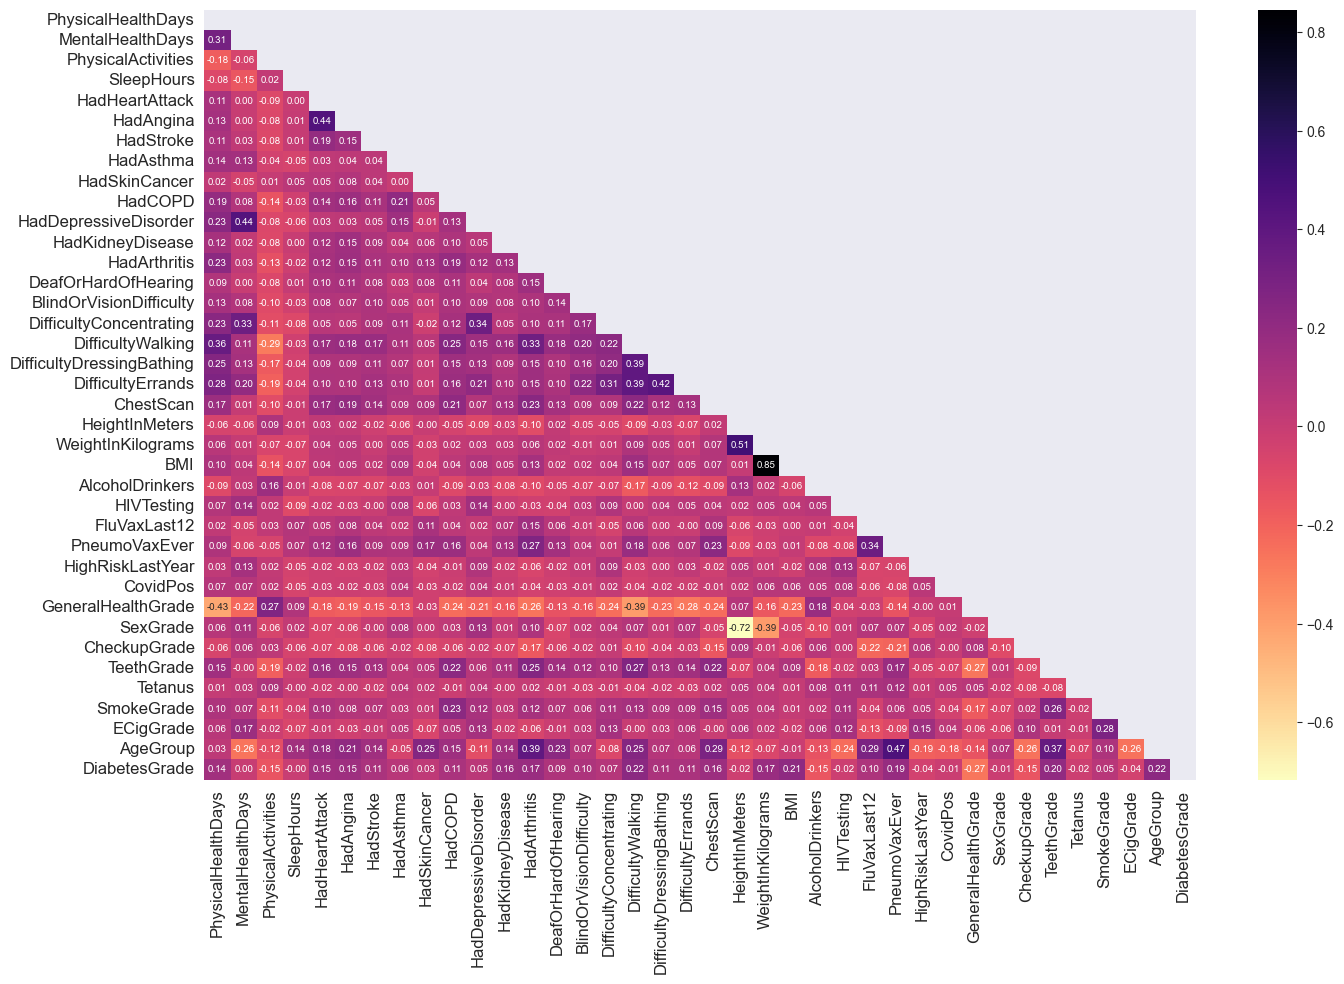

In [235]:
plt.figure(figsize=(16,10))
sns.heatmap(data=corr_matrix, mask=mask, annot=True, annot_kws={"size": 7}, fmt=".2f", cmap="magma_r")
sns.set_style('dark')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Heatmap - some interesting points
Age is correlationg with technically every disease (not asthma though!).
Many of the relatively high correlations between them are probably due to age as well --> We should create groups by it.

Being a male makes you taller... Who would have thought? :D

Covid positivity didn't do much

Women are a bit more prone to mental issues (seems underestimated here)

Hiv tesing and mental issues +0.14, interesting...

This GeneralHealthGrade seems quite useful (if it is not just due to age)




